# Table of content

1. Introduction - Loading libraries and dataset
2. Exploratory analysis, engineering and cleaning features - Bi-variate analysis
3. Correlation analysis - Tri-variate analysis
4. Predictive modelling, cross-validation, hyperparameters and ensembling
5. Submitting results
6. Credits

### Check other Kaggle notebooks from [Yvon Dalat](https://www.kaggle.com/ydalat):
* [Titanic, a step-by-step intro to Machine Learning](https://www.kaggle.com/ydalat/titanic-a-step-by-step-intro-to-machine-learning): **a practice run ar EDA and ML-classification**
* [HappyDB, a step-by-step application of Natural Language Processing](https://www.kaggle.com/ydalat/happydb-what-100-000-happy-moments-are-telling-us): **find out what 100,000 happy moments are telling us**
* [Work-Life Balance survey, an Exploratory Data Analysis of lifestyle best practices](https://www.kaggle.com/ydalat/work-life-balance-best-practices-eda): **key insights into the factors affecting our work-life balance**
*  [Work-Life Balance survey, a Machine-Learning analysis of best practices to rebalance our lives](https://www.kaggle.com/ydalat/work-life-balance-predictors-and-clustering): **discover the strongest predictors of work-life balance**

**Interested in more facts and data to balance your life, check the [360 Living guide](https://amzn.to/2MFO6Iy) ![360 Living: Practical guidance for a balanced life](https://images-na.ssl-images-amazon.com/images/I/61EhntLIyBL.jpg)**

**Note:** Ever feel burnt out? Missing a deeper meaning? Sometimes life gets off-balance, but with the right steps, we can find the personal path to authentic happiness and balance.
[Check out how Machine Learning and statistical analysis](https://www.amazon.com/dp/B07BNRRP7J?ref_=cm_sw_r_kb_dp_TZzTAbQND85EE&tag=kpembed-20&linkCode=kpe) sift through 10,000 responses to help us define our unique path to better living.

# 1. Introduction - Loading libraries and dataset
I created this Python notebook as the learning notes of my first Machine Learning project.
So many new terms, new functions, new approaches, but the subject really interested me; so I dived into it, studied one line of code at a time, and captured the references and explanations in this notebook.

The algorithm itself is a fork from **Anisotropic's Introduction to Ensembling/Stacking in Python**, a great notebook in itself.
His notebook was itself based on **Faron's "Stacking Starter"**, as well as **Sina's Best Working Classfier**. 
I also used multiple functions from **Yassine Ghouzam**.
I added many variations and additional features to improve the code (as much as I could) as well as additional visualization.

Some key take away from my personal experiments and what-if analysis over the last couple of weeks:

* **The engineering of the right features is absolutely key**. The goal there is to create the right categories between survived and not survived. They do not have to be the same size or equally distributed. What helped best is to group together passengers with the same survival rates.

* ** I tried many, many different algorightms. Many overfit the training data** (up to 90%) but do not generate more accurate predictions with the test data. What worked better is to use the cross-validation on selected algotirhms. It is OK to select algorithms with various results as there is strenght in diversity. 

* **Lastly, the right ensembling was best achieved** with a votingclassifier with soft voting parameter

One last word: please use this kernel as a first project to practice your ML/Python skills. I shameless ley sotle and learnt from many Kagglers through my learning process, please do the same with the code in this kernel.

I also welcome your comments, questions and feedback.

Yvon

## 1.1. Importing Library

In [1]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

# Machine learning libraries
import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
#from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

## 1.2. Loading dataset

In [3]:
# Load in the train and test datasets from the CSV files
train = pd.read_csv('../../Data/train.csv')
test = pd.read_csv('../../Data/test.csv')

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

# Display the first 5 rows of the dataset, a first look at our data
# 5 first row, 5 sample rows and basic statistics
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What are the data types for each feature?**
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

## 1.3. Analysis goal
**The Survived variable** is the outcome or dependent variable. It is a binary nominal datatype of 1 for "survived" and 0 for "did not survive".
**All other variables** are potential predictor or independent variables. The goal is to predict this dependent variable only using the available independent variables. A test dataset has been created to test our algorithm.

## 1.4. A very first look into the data

Text(0.5, 1.0, 'Survival Rate by Embarked')

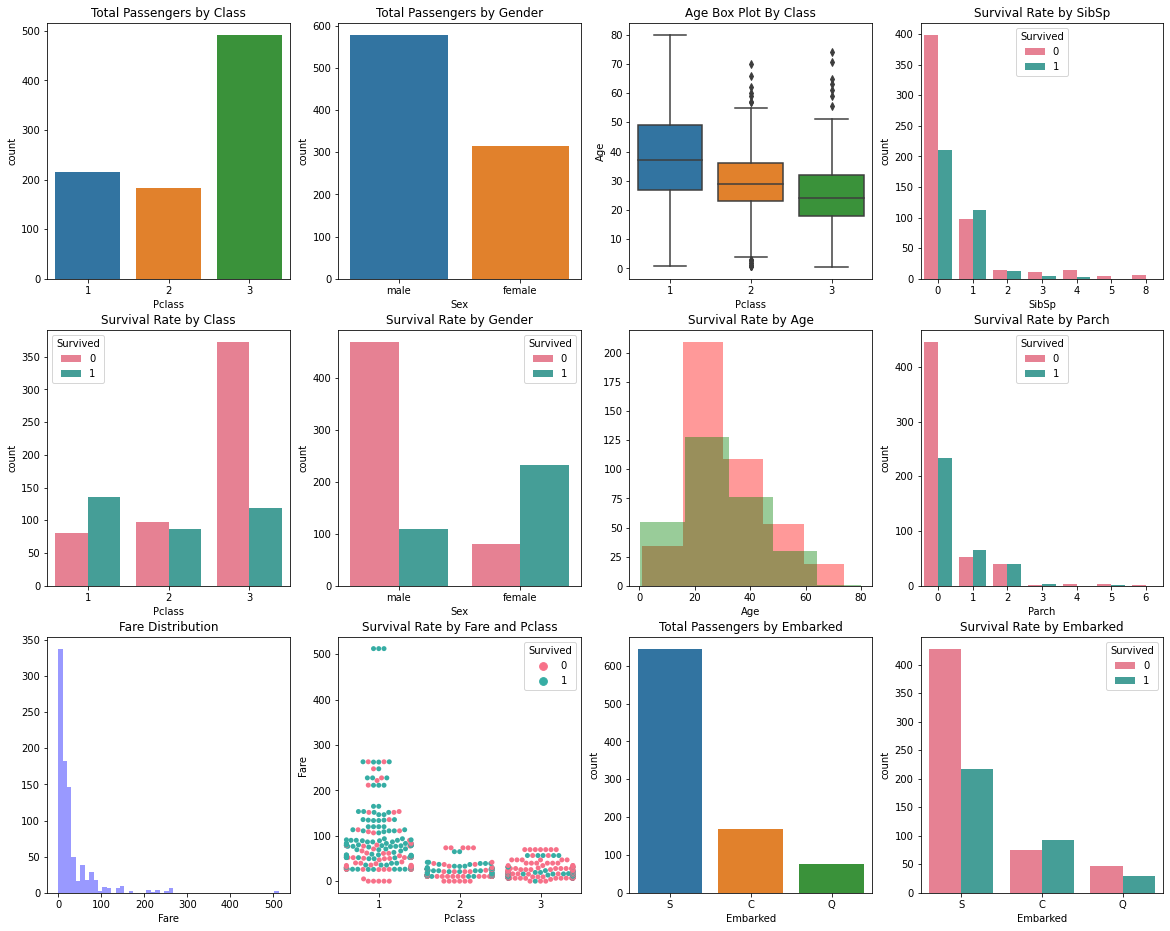

In [6]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Pclass',data=train,ax=ax[0,0])
sns.countplot('Sex',data=train,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=train,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=train,ax=ax[0,3],palette='husl')
sns.distplot(train['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot('Embarked',data=train,ax=ax[2,2])

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1,0],palette='husl')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1,1],palette='husl')
sns.distplot(train[train['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train[train['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot('Parch',hue='Survived',data=train,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train,palette='husl',ax=ax[2,1])
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

This is only a quick of the relationships between features before we start a more detailed analysis.


# 2. Exploratory Data Analysis (EDA), Cleaning and Engineering features

We will start with a standard approach of any kernel: correct, complete, engineer the right features for analysis.

## 2.1. Correcting and completing features
### Detecting and correcting outliers
Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.

There are potential outliers that we will identify (steps from Yassine Ghouzam):
* It creates firset a function called detect_outliers, implementing the Tukey method
* For each column of the dataframe, this function calculates the 25th percentile (Q1) and 75th percentile (Q3) values.
* The  interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between the 75th and 25th percentiles, or between upper and lower quartiles.
* Any data points outside 1.5 time the IQR (1.5 time IQR below Q1, or 1.5 time IQR above Q3), is considered an outlier.
* The outlier_list_col column captures the indices of these outliers. All outlier data get then pulled into the outlier_indices dataframe.
* Finally, the detect_outliers function will select only the outliers happening multiple times. This is the datadframe that will be returned.

In [7]:
# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


** Observations**
* The Detect_Outliers function found 10 outliers.
* PassengerID 28, 89 and 342 passenger have an high Ticket Fare
* The seven others have very high values of SibSP.
* I found that dropping the outliers actually lower the prediction. So I decided to keep them.

You can try to remove them and rerun the prediction to observe the result with the following function:

In [8]:
# Drop outliers
# train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

### Completing features
The .info function below shows how complete or incomplete the datasets are.
There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values.

The approach to to complete missing data is to impute using mean, median, or mean + randomized standard deviation. 
We will do this in section 2.2 with the  **fillna** function:  dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [9]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## 2.2. Descriptive analysis (univariate) 

In [10]:
full_data = [train, test]
Survival = train['Survived']
Survival.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

## 2.3 Feature Engineering - Bi-variate statistical analysis

One of the first tasks in Data Analytics is to **convert the variables into numerical/ordinal values**.
There are multiple types of data

**a) Qualitative data: discrete**
* Nominal: no natural order between categories. In this case: Name
* Categorical: Sex

**b) Numeric or quantitative data**
* Discrete: could be ordinal like Pclass or not like Survived.
* Continuous. e.g.: age
Many feature engineering steps were taken from Anisotropic's excellent kernel.

### Pclass

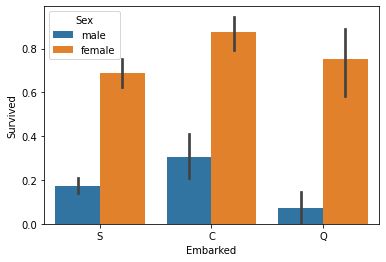

In [11]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train);

Embarked does not seem to have a clear impact on the survival rate. We will analyse it further in the next sections and drop it if we cannot demonstrate a proven relationship to Survived. 

### Name_length

<AxesSubplot:xlabel='Name_length', ylabel='Survived'>

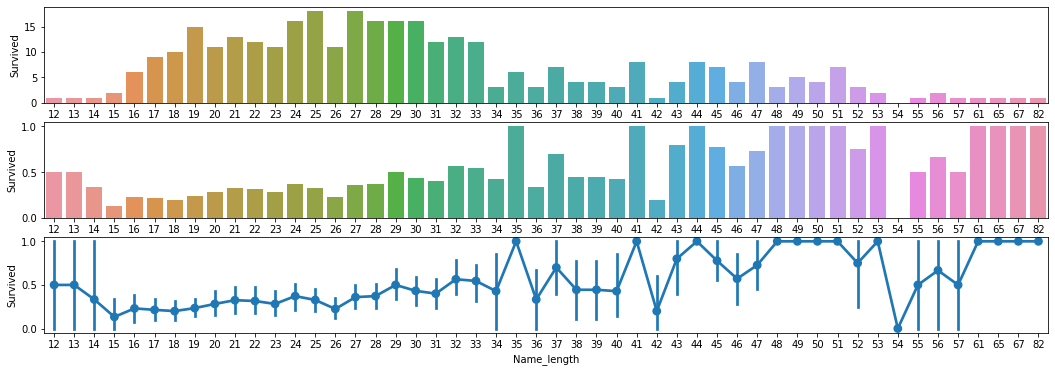

In [12]:
for dataset in full_data:
    dataset['Name_length'] = train['Name'].apply(len)
    # Qcut is a quantile based discretization function to autimatically create categories
    # dataset['Name_length'] = pd.qcut(dataset['Name_length'], 6, labels=False)
    # train['Name_length'].value_counts()

sum_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).sum()
average_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).mean()
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
sns.barplot(x='Name_length', y='Survived', data=sum_Name, ax = axis1)
sns.barplot(x='Name_length', y='Survived', data=average_Name, ax = axis2)
sns.pointplot(x = 'Name_length', y = 'Survived', data=train, ax = axis3)

The first graph shows the amount of people by Name_length.

The second one, their average survival rates.

The proposed categories are: less than 23 (mostly men), 24 to 28, 29 to 40, 41 and more (mostly women).
The categories are sized to group passengers with similar Survival rates.

In [13]:
for dataset in full_data:
    dataset.loc[ dataset['Name_length'] <= 23, 'Name_length'] 						            = 0
    dataset.loc[(dataset['Name_length'] > 23) & (dataset['Name_length'] <= 28), 'Name_length']  = 1
    dataset.loc[(dataset['Name_length'] > 28) & (dataset['Name_length'] <= 40), 'Name_length']  = 2
    dataset.loc[ dataset['Name_length'] > 40, 'Name_length'] 							        = 3
train['Name_length'].value_counts()

0    360
1    240
2    201
3     90
Name: Name_length, dtype: int64

### Gender (Sex)

In [14]:
for dataset in full_data:# Mapping Gender
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

### Age

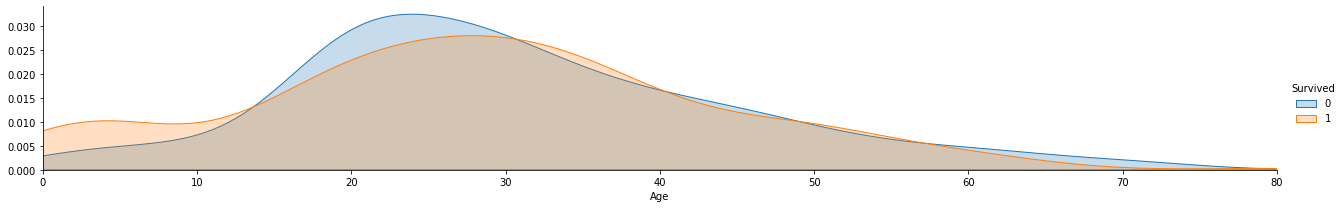

In [15]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( train, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

The best categories for age are:
* 0:  Less than 14
* 1:  14 to 30
* 2:  30 to 40
* 3:  40 to 50
* 4:  50 to 60
* 5:  60 and more

In [16]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
# Qcut is a quantile based discretization function to autimatically create categories (not used here)
# dataset['Age'] = pd.qcut(dataset['Age'], 6, labels=False)
# Using categories as defined above
    dataset.loc[ dataset['Age'] <= 14, 'Age'] 						          = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age']        = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age']        = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age']        = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age']        = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] 							      = 4
train['Age'].value_counts()

5    419
1    223
3    107
0     78
2     42
4     22
Name: Age, dtype: int64

In [17]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0,0.576923
2,2,0.404762
1,1,0.390135
5,5,0.360382
3,3,0.345794
4,4,0.227273


### Family: SibSp and Parch

This section creates a new feature called FamilySize consisting of SibSp and Parch.

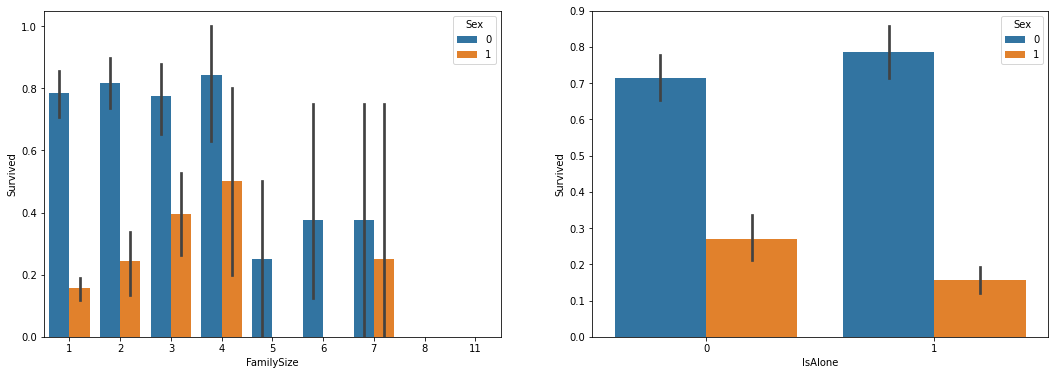

In [18]:
for dataset in full_data:
# Create new feature FamilySize as a combination of SibSp and Parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
# Create new feature IsAlone from FamilySize
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Create new feature Boys from FamilySize
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
    
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="IsAlone", y="Survived", hue="Sex", data=train, ax = axis2);

IsAlone does not result in a significant difference of survival rate. In addition, the slight difference between men and women go in different direction, i.e. IsAlone alone is not a good predictor of survival. O will drop this feature.

### Fare

In [19]:
# Interactive chart using cufflinks
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist', bins=30)

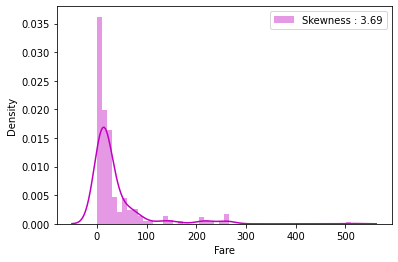

In [20]:
# Remove all NULLS in the Fare column and create a new feature Categorical Fare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Explore Fare distribution 
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

**Observations**
* The Fare distribution is very skewed to the left. This can lead to overweigthing the model with very high values.
* In this case, it is better to transform it with the log function to reduce the skewness and redistribute the data.

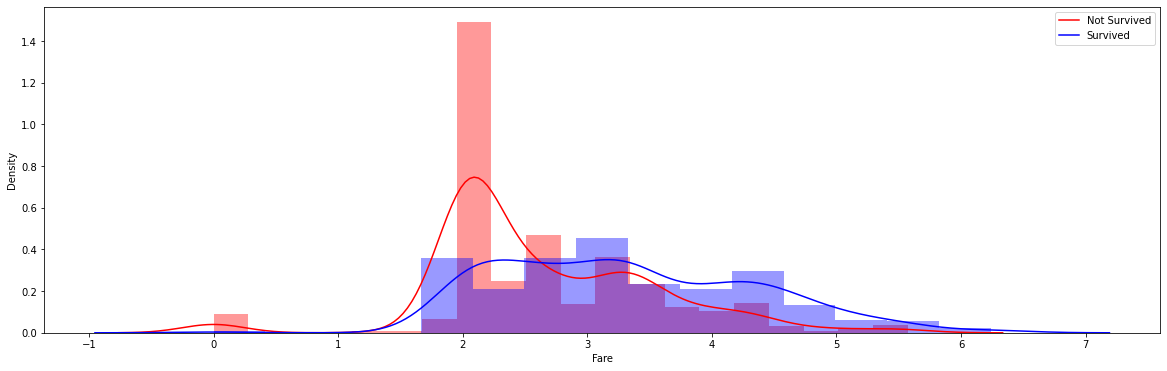

In [21]:
# Apply log to Fare to reduce skewness distribution
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

**Observations**
Log Fare categories are:
* 0 to 2.7: less survivors
* More than 2.7 more survivors

In [22]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 2.7, 'Fare'] 						      = 0
#    dataset.loc[(dataset['Fare'] > 2.7) & (dataset['Fare'] <= 3.2), 'Fare']   = 1
#    dataset.loc[(dataset['Fare'] > 3.2) & (dataset['Fare'] <= 3.6), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 2.7, 'Fare'] 							  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train['Fare'].value_counts()

0    457
3    434
Name: Fare, dtype: int64

### Cabin

In [23]:
# Feature that tells whether a passenger had a cabin on the Titanic (O if no cabin number, 1 otherwise)
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,136


In [24]:
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


It appears that Has_Cabin has a strong impact on the Survival rate. We will keep this feature.

### Embarked

In [25]:
for dataset in full_data:
# Remove all NULLS in the Embarked column
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

Pclass,1,2,3,All
Embarked,,,,
0,0.589147,0.463415,0.189802,0.339009
1,0.694118,0.529412,0.378788,0.553571
2,0.500000,0.666667,0.375000,0.389610
All,0.629630,0.472826,0.242363,0.383838


Irrespective of the class, passengers embarked in 0 (S) and 2 (Q) have lower chance of survival. I will combine those into the first category.

In [26]:
dataset['Embarked'] = dataset['Embarked'].replace(['0', '2'], '0')
train['Fare'].value_counts()

0    457
3    434
Name: Fare, dtype: int64

### Titles

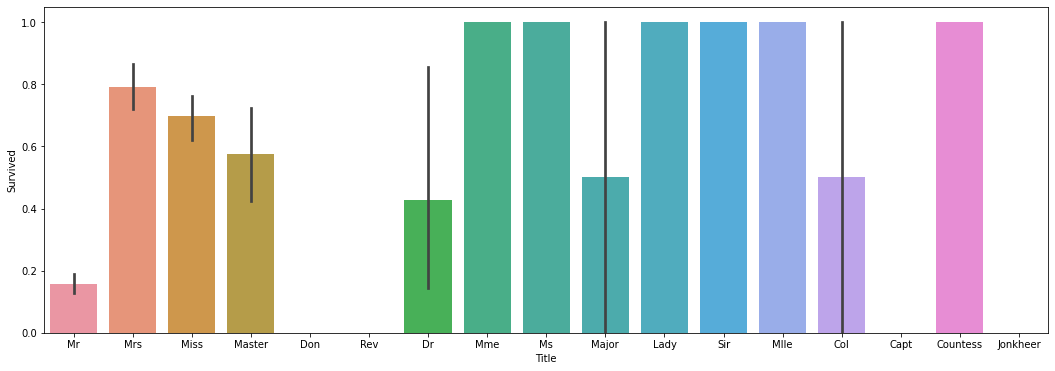

In [27]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
# Create a new feature Title, containing the titles of passenger names
    dataset['Title'] = dataset['Name'].apply(get_title)

fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y="Survived", data=train, ax=axis1);

There are 4 types of titles:
0. Mme, Ms, Lady, Sir, Mlle, Countess: 100%. 
1. Mrs, Miss: around 70% survival
2. Master: around 60%
3. Don, Rev, Capt, Jonkheer: no data
4. Dr, Major, Col: around 40%
5. Mr: below 20%

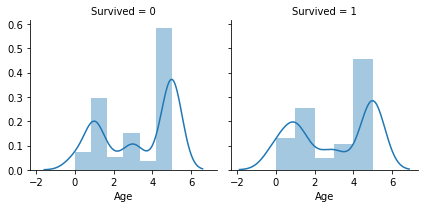

In [28]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
# Mapping titles
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)
    
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

In [29]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
0,0,1.000000
1,1,0.736156
2,2,0.575000
4,4,0.454545
5,5,0.156673
3,3,0.000000


### Extracting deck from cabin
A cabin number looks like ‘C123’ and the letter refers to the deck: a big thanks to Nikas Donge.
Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [30]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
train['Deck'].value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

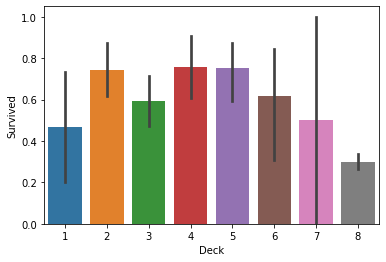

In [31]:
sns.barplot(x = 'Deck', y = 'Survived', order=[1,2,3,4,5,6,7,8], data=train)

3 types of deck: 1 with 15 passengers, 2 to 6, and 7 to 8 (most passengers)

In [32]:
for dataset in full_data:
    dataset.loc[ dataset['Deck'] <= 1, 'Deck'] = 1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 3
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 0
train[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Deck,Survived
2,3,0.690217
1,1,0.437500
0,0,0.301013


## 2.4 Visualising updated dataset

In [33]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,892,3,"Kelly, Mr. James",1,1,0,0,330911,0,U0,2,0,1,1,0,0,5.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,3,1,0,363272,0,U0,0,3,2,0,0,0,1.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,4,0,0,240276,0,U0,2,0,1,1,0,0,5.0,0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,0,U0,0,3,1,1,0,0,5.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,5,1,1,3101298,0,U0,0,1,3,0,0,0,1.0,0


In [34]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,U0,0,0,2,0,0,0,5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,3,C85,1,3,2,0,0,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,U0,0,0,1,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,3,C123,0,3,2,0,0,1,1,3
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,U0,0,1,1,1,0,0,5,0


## 2.5. Descriptive statistics

In [35]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,3.154882,0.523008,0.381594,1.461279,0.361392,1.023569,1.904602,0.602694,0.043771,0.228956,3.415264,0.637486
std,257.353842,0.486592,0.836071,0.477990,1.929262,1.102743,0.806057,1.500342,0.635673,1.016993,1.613459,0.489615,0.204700,0.420397,1.912805,1.213180
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,3.000000,2.000000,3.000000,11.000000,1.000000,1.000000,1.000000,5.000000,3.000000


In [36]:
train[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Title', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,2.531876,0.852459,3.285974,0.329690,1.125683,0.307832,0.123862,1.883424,4.273224
1,1,1.950292,0.318713,2.944444,0.464912,2.000000,0.447368,0.397661,1.938596,2.038012


**Initial observations from the descriptive statistics:**
* Only 38% survived, a real tragedy :-(
* Passengers in more expensive classes 1 and 2 had much higher chance of surviving than classes 3 or 4.
* Also, the higher the fare, the higher the chance. Similarly, having a cabin increases the chance of survival.
* Women (0) higher chance than men (1)
* Younger people slightly more chance than older
* Being alone decreased your chance to survive.

We will drop unncessary features just before Section 3.1. Pearson Correlation heatmap.

# 3. Correlation analysis - Multi-variate analysis
This section summarizes  bivariate analysis asthe simplest forms of quantitative (statistical) analysis.
It involves the analysis of one or two features, and their relative impact of "Survived". 
This is a useful frist step of our anblaysis in order to determine the empirical relationship between all features.

## 3.1. Correlation analysis with histograms and pivot-tables

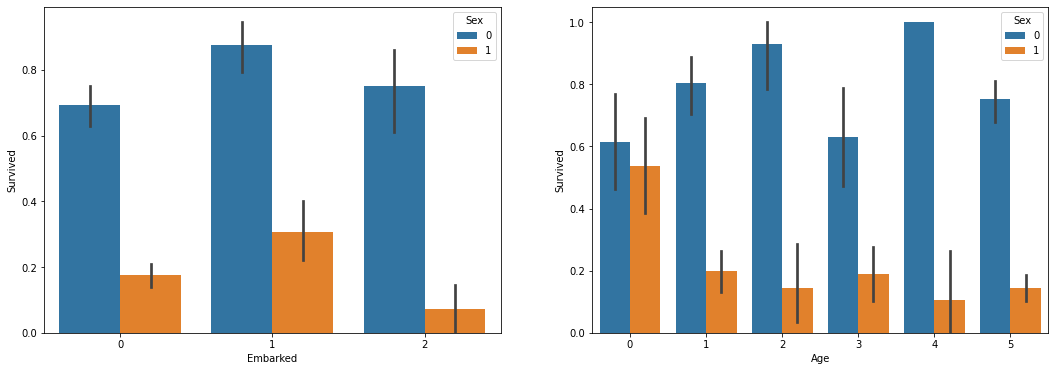

In [37]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="Age", y="Survived", hue="Sex", data=train, ax = axis2);

**Observations for Age graph:**
* 0 or blue represent women; 1 or orange represent men. Gender and age seem to have a stronger influece of the survival rate.
* We start to find where most survivors are: older women (48 to 64 year old), and younger passengers.
* What is statistically interesting is that only young boys (Age Category = 0) have  high survival rates, unlike other age groups for men.
* We will create a new feature called young boys

In [38]:
# for dataset in full_data:
#    dataset['Boys'] = 0
#    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
# dataset['Boys'].value_counts()

In [39]:
train[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
for dataset in full_data:
    dataset['Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==0), 'Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==2), 'Gender_Embarked'] = 1
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==1), 'Gender_Embarked'] = 2
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==2), 'Gender_Embarked'] = 3
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==0), 'Gender_Embarked'] = 4
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==1), 'Gender_Embarked'] = 5
train[["Gender_Embarked", "Survived"]].groupby(['Gender_Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Gender_Embarked,Survived
2,2,0.876712
1,1,0.750000
0,0,0.692683
5,5,0.305263
4,4,0.174603
3,3,0.073171


In [41]:
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

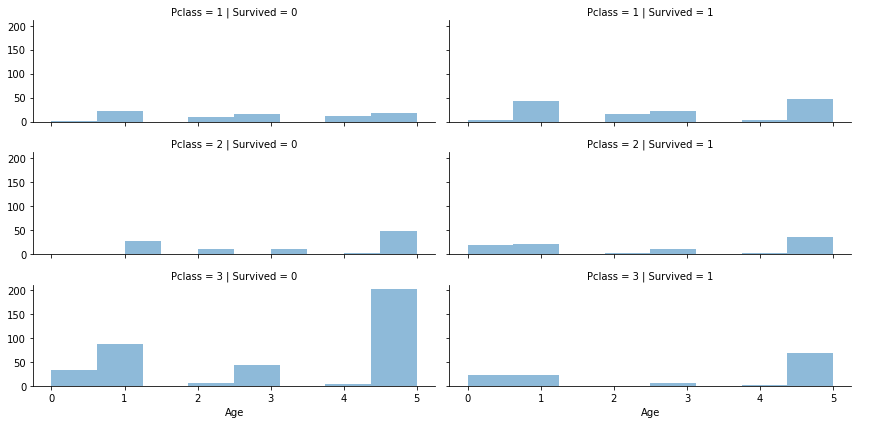

In [42]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=8)
grid.add_legend();

**Observations: here are the survivors!**
1. Family-size of 3 or 4 from first pivot
2. Women and men alone on first class (second pivot, red showing survival rate below 0.4)
3. Top-right in the graph above: first class and age categories 1 and 2

** The not-so lucky are mostly in men, Pclass 3 and age category 1 (younger folks)**

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

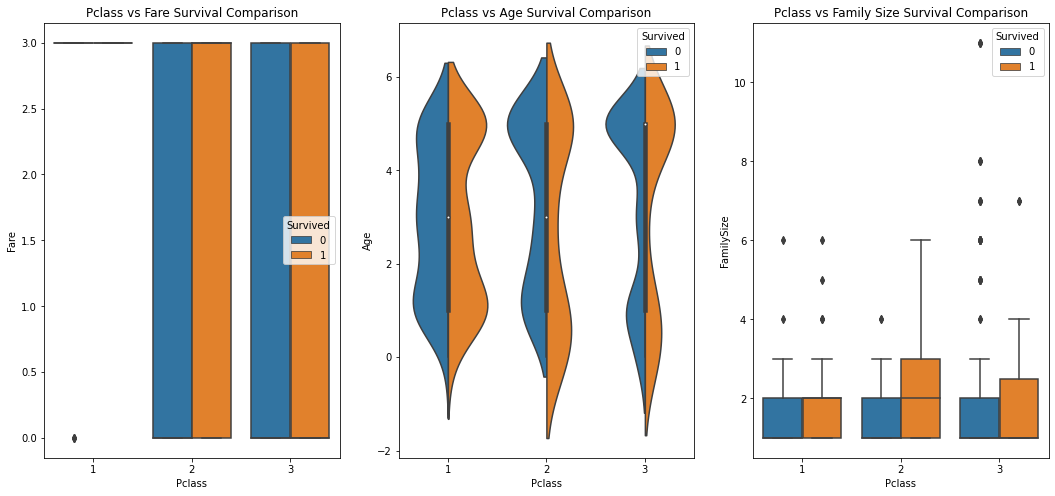

In [43]:
#graph distribution of qualitative data: Pclass
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(18,8))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

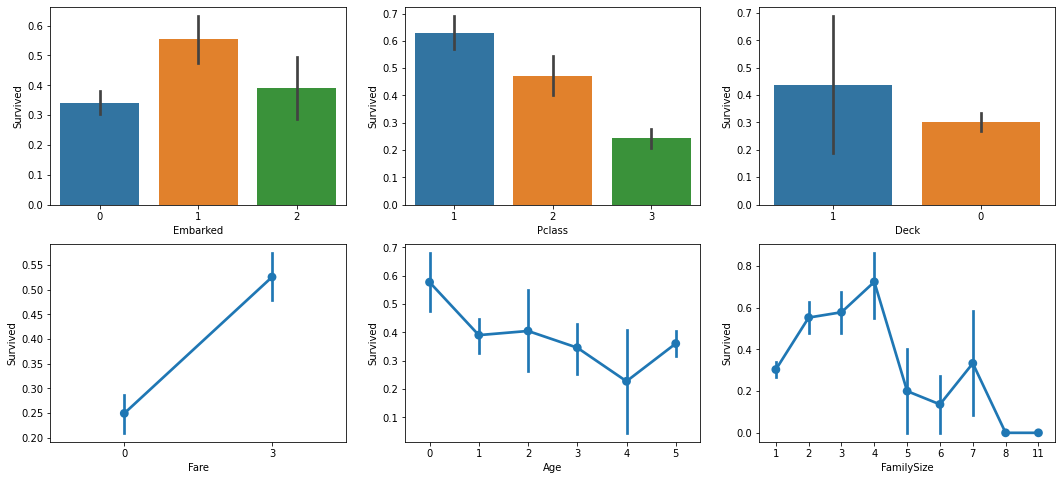

In [44]:
fig, saxis = plt.subplots(2, 3,figsize=(18,8))

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = saxis[0,1])
sns.barplot(x = 'Deck', y = 'Survived', order=[1,0], data=train, ax = saxis[0,2])

sns.pointplot(x = 'Fare', y = 'Survived',  data=train, ax = saxis[1,0])
sns.pointplot(x = 'Age', y = 'Survived',  data=train, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train, ax = saxis[1,2])

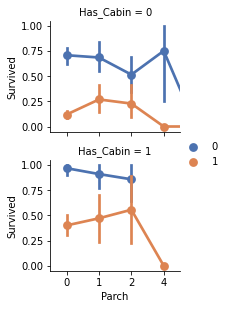

In [45]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Has_Cabin', size=2.2, aspect=1.2)
grid.map(sns.pointplot, 'Parch', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations:**
* The colors represent: blue=0 is for women, green=1 for men
* Clearly, women had more chance of surviving, with or without cabin
* Interesting is that accompanied women without a cabin had less survival chance than women alone without cabin.
    But this is not true for men. Men alone have less chance than accompanied.
    
    **Bottom-line: it would have been better for women without cabin to pretend that they were alone.
    And lone men should join a family to improve their survival rates.**

## 3.2. Dropping features
Bottom-line of the bi-variate and tri-variate analysis as well as the feature importance analysis (from running the classifiers multiple times), **I decided to drop less-relevant features**. This happened as an iterative process by reviwing the outcome of the feature importance graph in the next section.
The problem with less important features is that they create more noice and actually take over the importance of real features like Sex and Pclass.

**The next step after dropping less-relevant features is to scale them, a very good recommendation from Konstantin's kernel**
It helps to boost the score. Scaling features is helpful for many ML algorithms like KNN for example, it really boosts their score.
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization.
Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.
The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

In [46]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Boys', 'IsAlone', 'Embarked']

train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

## 3.3. Pearson Correlation Heatmap

The Seaborn plotting package allows us to plot heatmaps showing the Pearson product-moment correlation coefficient (PPMCC) correlation between features.
Pearson is bivariate correlation, measuring the linear correlation between two features. 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

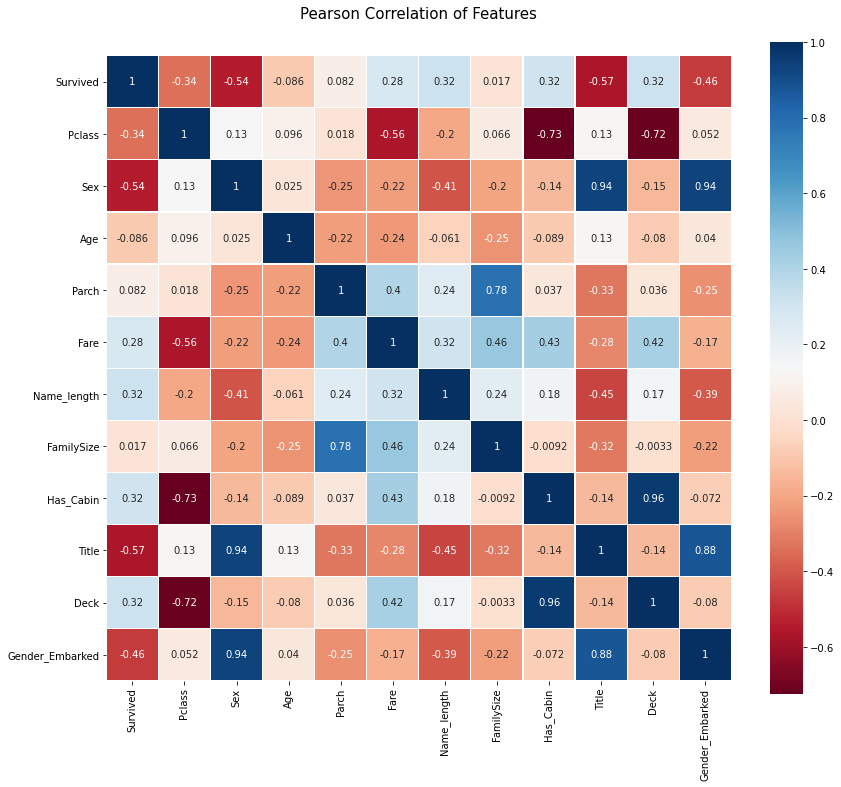

In [47]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Observations from the Pearson analysis:** 
* Correlation coefficients with magnitude between 0.5 and 0.7 indicate variables which can be considered **moderately correlated**.
* We can see from the red cells that many features are "moderately" correlated: specifically, IsAlone, Pclass, Name_length, Fare, Sex.
* This is influenced by the following two factors: 1) Women versus men (and the compounding effect of Name_length) and 2) Passengers paying a high price (Fare) have a higher chance of survival: there are also in first class, have a title. 


## 3.4. Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other.
The Seaborn pairplot class will help us visualize the distribution of a feature in relationship to each others.

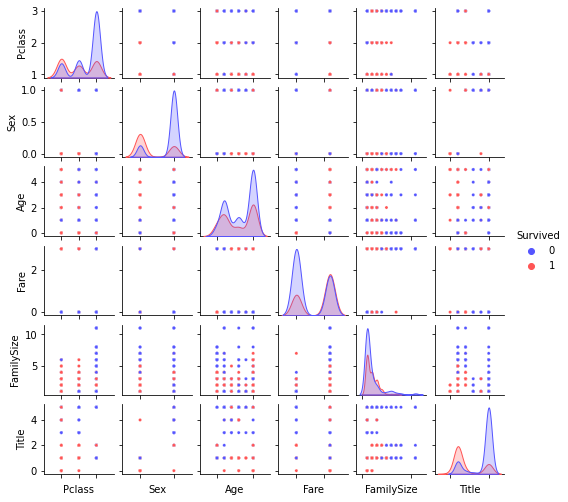

In [48]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare',
       u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

**Observations**
* The pairplot graph all trivariate analysis into one figure.
* The clustering of red dots indicates the combination of two features results in higher survival rates, or the opposite (clustering of blue dots = lower survival)
For example:
- Smaller family sizes in first and second class
- Middle age with Pclass in third category = only blue dot
This can be used to validate that we extracted the right features or help us define new ones.

In [49]:
# X_train (all features for training purpose but excluding Survived),
# Y_train (survival result of X-Train) and test are our 3 main datasets for the next sections
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_train.shape, Y_train.shape, test.shape

from sklearn.cross_validation import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)

X_test = test.copy() # test data for Kaggle submission
#std_scaler = StandardScaler()
#X_train = std_scaler.fit_transform(X_train)
#X_test = std_scaler.transform(X_test)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

# 4. Predictive modelling, cross-validation, hyperparameters and ensembling

* 4.1. Logistic Regression
* 4.2. Support Vector Machines (supervised)
* 4.3. k-Nearest Neighbors algorithm (k-NN)
* 4.4. Naive Bayes classifier
* 4.5. Perceptron
* 4.6 Linear SVC
* 4.7 Stochastic Gradient Descent
* 4.8. Decision tree
* 4.9 Random Forrest
* 4.10 Model summary
* 4.11. Model cross-validation with K-Fold
* 4.12 Hyperparameter tuning & learning curves for selected classifiers
* 4.13 Selecting and combining the best classifiers
* 4.14 Ensembling
* 4.15. Summary of most important features

## 4.1. Logistic Regression
Logistic regression measures the relationship between the categorical dependent feature (in our case Survived) and the other independent features.
It estimates probabilities using a cumulative logistic distribution:
* The first value shows the accuracy of this model
* The table after this shows the importance of each feature according this classifier.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pred1))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred1), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

In [51]:
#coeff_df = pd.DataFrame(X_train.columns.delete(0))
#coeff_df.columns = ['Feature']
#coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
#coeff_df.sort_values(by='Correlation', ascending=False)

**Observation:**
* This classfier confirms the importance of Name_length
* FamilySize did not show a strong Pearson correlation with Survived but comes here to the top. This can be due to its strong relationship with other features such as Is_Alone or Parch (Parent-Children).


## 4.2. Support Vector Machines (supervised)
Given a set of training samples, each sample is marked as belonging to one or the other of two categories.

The SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [52]:
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc

80.22

In [53]:
print(classification_report(y_test, Y_pred2))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred2), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.78      0.91      0.84       154
          1       0.84      0.66      0.74       114

avg / total       0.81      0.80      0.80       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 140                   14
Actual: SURVIVED             39                   75


## 4.3. k-Nearest Neighbors algorithm (k-NN)
This is a non-parametric method used for classification and regression.
A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

In [54]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=10, p=2, 
                           weights='uniform')
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)

# Preparing data for Submission 1
test_Survived = pd.Series(knn_predictions, name="Survived")
Submission1 = pd.concat([PassengerId,test_Survived],axis=1)
acc_knn

77.24

In [55]:
print(classification_report(y_test, knn_predictions))
cm = pd.DataFrame(confusion_matrix(y_test, knn_predictions), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.75      0.91      0.82       154
          1       0.83      0.59      0.69       114

avg / total       0.78      0.77      0.76       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 140                   14
Actual: SURVIVED             47                   67


In [56]:
Submission1.head(5)

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,1.0
4,896,0.0


[8, 0.7815533980582524]


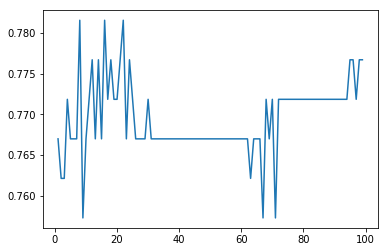

In [57]:
## Selecting the right n_neighbors for the k-NN classifier
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(X_train,Y_train,test_size = .33, random_state = 0)
nn_scores = []
best_prediction = [-1,-1]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p =2)
    knn.fit(x_trainknn, y_trainknn)
    score = accuracy_score(y_testknn, knn.predict(x_testknn))
    #print i, score
    if score > best_prediction[1]:
        best_prediction = [i, score]
    nn_scores.append(score)
print (best_prediction)
plt.plot(range(1,100),nn_scores)

## 4.4. Naive Bayes classifier
This is a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of features in a learning problem.

In [58]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred3 = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
acc_gaussian

76.12

In [59]:
print(classification_report(y_test, Y_pred3))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred3), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.82      0.75      0.78       154
          1       0.70      0.77      0.73       114

avg / total       0.77      0.76      0.76       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 116                   38
Actual: SURVIVED             26                   88


## 4.5. Perceptron
This is an algorithm for supervised learning of binary classifiers: like the other classifiers before, it decides whether an input, represented by a vector of numbers, belongs to some specific class or not. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [60]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred4 = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_test, y_test) * 100, 2)
acc_perceptron

69.4

In [61]:
print(classification_report(y_test, Y_pred4))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred4), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.65      0.99      0.79       154
          1       0.97      0.29      0.45       114

avg / total       0.79      0.69      0.64       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 153                    1
Actual: SURVIVED             81                   33


## 4.6. Linear SVC
This is another implementation of Support Vector Classification (similar to 4.2.) for the case of a linear kernel.

In [62]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred5 = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
acc_linear_svc

79.48

In [63]:
print(classification_report(y_test, Y_pred5))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred5), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       154
          1       0.80      0.69      0.74       114

avg / total       0.80      0.79      0.79       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 134                   20
Actual: SURVIVED             35                   79


## 4.7. Stochastic Gradient Descent (sgd)
This is a stochastic approximation of the gradient descent optimization and iterative method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.

In [64]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred6 = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
acc_sgd

76.87

In [65]:
print(classification_report(y_test, Y_pred6))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred6), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.73      0.94      0.82       154
          1       0.87      0.54      0.66       114

avg / total       0.79      0.77      0.76       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 145                    9
Actual: SURVIVED             53                   61


## 4.8. Decision tree
This predictive model  maps features (tree branches) to conclusions about the target value (tree leaves).

The target features  take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred7 = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

76.87

In [67]:
print(classification_report(y_test, Y_pred7))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred7), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.77      0.65      0.70       114

avg / total       0.77      0.77      0.77       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 132                   22
Actual: SURVIVED             40                   74


## 4.9. Random Forests
This is one of the most popular classfier.
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [68]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)


# Preparing data for Submission 2
test_Survived = pd.Series(random_forest_predictions, name="Survived")
Submission2 = pd.concat([PassengerId,test_Survived],axis=1)

acc_random_forest

77.61

In [69]:
print(classification_report(y_test, random_forest_predictions))
cm = pd.DataFrame(confusion_matrix(y_test, random_forest_predictions), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

             precision    recall  f1-score   support

          0       0.77      0.86      0.82       154
          1       0.78      0.66      0.71       114

avg / total       0.78      0.78      0.77       268

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 133                   21
Actual: SURVIVED             39                   75


## 4.10. Model summary
I found that the picture illustrates the various model better than words.
This should be taken with a grain of salt, as the intuition conveyed by these two-dimensional examples does not necessarily carry over to real datasets.
The reality os that the algorithms work with many dimensions (11 in our case).

But it shows how each classifier algorithm partitions the same data in different ways.
The three rows represent the three different data set on the right.
The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

For instance, the visualization helps understand how RandomForest uses multiple Decision Trees, the linear SVC, or Nearest Neighbors grouping sample by their relative distance to each others.

![image](http://scikit-learn.org/0.15/_images/plot_classifier_comparison_0011.png)


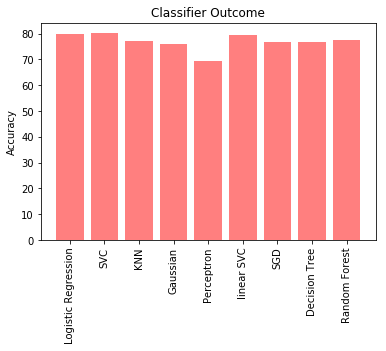

In [70]:
objects = ('Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'linear SVC', 'SGD', 'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))
accuracies1 = [acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

**Observations**
* The above models (classifiers) were applied to a split training and x_test datasets.
* This results in some classifiers (Decision_tree and Random_Forest) over-fitting the model to the training data. 
* This happens when the classifiers use many input features (to include noise in each feature) on the complete dataset, and ends up “memorizing the noise” instead of finding the signal.
* This overfit model will then make predictions based on that noise. It performs unusually well on its training data, but will not necessarilyimprove the prediction quality with new data from the test dataset.
* In the next section, we will cross-validate the models using sample data against each others. We will this by using StratifiedKFold to train and test the models on sample data from the overall dataset.
Stratified K-Folds is a cross validation iterator. It provides train/test indices to split data in train test sets. This cross-validation object is a variation of KFold, which returns stratified folds. The folds are made by preserving the percentage of samples for each class.

## 4.11. Model cross-validation with K-Fold

The fitting process applied above optimizes the model parameters to make the model fit the training data as well as possible.
Cross-validation is a way to predict the fit of a model to a hypothetical validation set when an explicit validation set is not available.
In simple words, it allows to test how well the model performs on new data.
In our case, cross-validation will also be applied to compare the performances of different predictive modeling procedures. 
![Cross-validation process:](https://image.slidesharecdn.com/kagglesharingmarkpeng20151216finalpresented-151216161621/95/general-tips-for-participating-kaggle-competitions-13-638.jpg?cb=1452565877)
### Cross-validation scores

In [51]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2

classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(Perceptron(random_state=random_state))
classifiers.append(LinearSVC(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['Logistic Regression',  'KNN', 'Gaussian',
    'Perceptron', 'linear SVC', 'SGD', 'Decision Tree','SVMC', 'Random Forest']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

NameError: name 'KNeighborsClassifier' is not defined

## 4.12 Hyperparameter tuning & learning curves for selected classifiers

**1. Adaboost** is used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers.

**2. ExtraTrees** implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

**3. RandomForest ** operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

**4. GradientBoost ** produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

**5. SVMC, or Support Vector Machines.**vGiven a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

All descripotion adapted from Wikipedia.

In [72]:
# Adaboost
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=7)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
adaDTC_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    2.0s finished


0.7929373996789727

In [54]:
# ExtraTrees 
ExtC = ExtraTreesClassifier()
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.5min finished


0.8271660424469414

In [74]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 420 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   23.3s finished


0.826645264847512

In [75]:
# SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1,10,50,100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_
# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   10.4s finished


0.8362760834670947

In [76]:
# Random Forest
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsrandom_forest = GridSearchCV(random_forest,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsrandom_forest.fit(X_train,Y_train)
# Best score
random_forest_best = gsrandom_forest.best_estimator_
gsrandom_forest.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.5min finished


0.8362760834670947

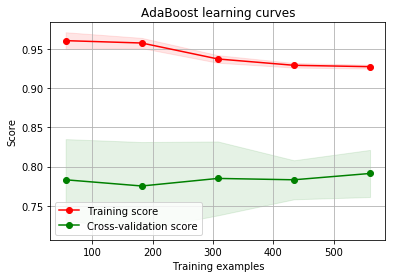

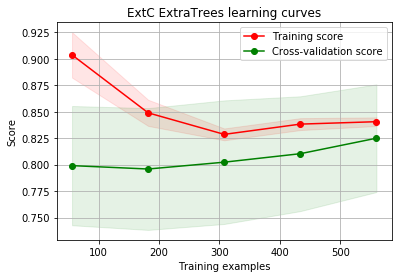

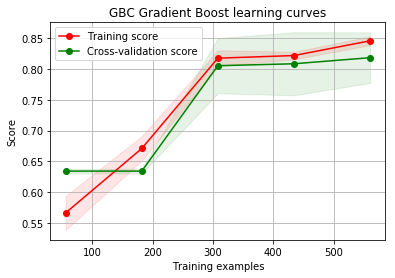

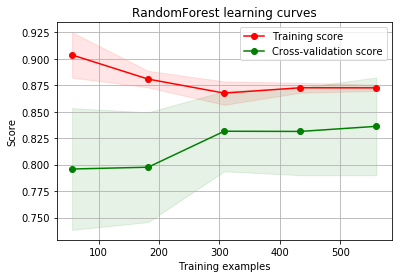

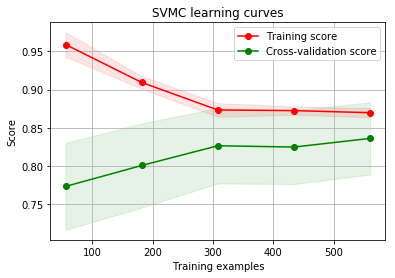

In [77]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtC ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GBC Gradient Boost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsrandom_forest.best_estimator_,"RandomForest learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVMC learning curves",X_train,Y_train,cv=kfold)

**Observations to fine-tune our models**

First, let's compare their best score after fine-tuning their parameters:
1. Adaboost: 80
2. ExtraTrees: 83
3. RandomForest: 82
4. GradientBoost: 82
5. SVC: 83

It appears that GBC and SVMC are doing the best job on the Train data. This is good because we want to keep the model as close to the training data as possible. But not too close!
The two major sources of error are bias and variance; as we reduce these two, then we could build more accurate models:

* **Bias**: The less biased a method, the greater its ability to fit data well.
* **Variance**: with a lower bias comes typically a higher the variance. And therefore the risk that the model will not adapt accurately to new test data.
This is the case here with Gradient Boost: high score but cross-validation is very distant.

The reverse also holds: the greater the bias, the lower the variance. A high-bias method builds simplistic models that generally don't fit well training data. 
We can see the red and green curves from ExtraTrees, RandomForest and SVC are pretty close.
**This points to a lower variance, i.e. a stronger ability to apply the model to new data.**

I used the above graphs to optimize the parameters for Adaboost, ExtraTrees, RandomForest, GradientBoost and SVC.
This resulted in a significant improvement of the prediction accuracy on the test data (score).

In addition, I found out that AdaBoost does not do a good job with this dataset as the training score and cross-validation score are quite far apart. 

## 4.13 Selecting and combining the best classifiers
So, how do we achieve the best trade-off beween bias and variance?
1. We will first compare in the next section the classifiers; results between themselves and applied to the same test data.
2. Then "ensemble" them together with an automatic function callled *voting*.

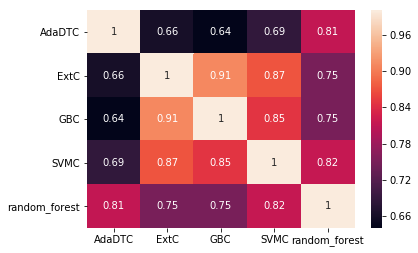

In [78]:
test_Survived_AdaDTC = pd.Series(adaDTC_best.predict(X_test), name="AdaDTC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_test), name="SVMC")
test_Survived_random_forest = pd.Series(random_forest_best.predict(X_test), name="random_forest")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_AdaDTC, test_Survived_ExtC, test_Survived_GBC,test_Survived_SVMC,test_Survived_random_forest],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

**Observations:**
* As indicated before, Adaboost has the lowest correlations when compared to other predictors. This indicates that it predicts differently than the others when it comes to the test data.
* We will therefore 'ensemble' the remaining four predictors.

## 4.14 Ensembling
This is the final step, pulling it together with an amazing 'Voting' function from sklearn.
An ensemble is a supervised learning algorithm, that it can be trained and then used to make predictions.
The last line applied the "ensemble predictor" to the test data for submission.

In [79]:
VotingPredictor = VotingClassifier(estimators=[('ExtC', ExtC_best), ('GBC',GBC_best),
('SVMC', SVMC_best), ('random_forest', random_forest_best)], voting='soft', n_jobs=4)
VotingPredictor = VotingPredictor.fit(X_train, Y_train)
VotingPredictor_predictions = VotingPredictor.predict(test)
test_Survived = pd.Series(VotingPredictor_predictions, name="Survived")

# Preparing data for Submission 3
test_Survived = pd.Series(VotingPredictor_predictions, name="Survived")
Submission3 = pd.concat([PassengerId,test_Survived],axis=1)
Submission3.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## 4.15. Summary of most important features

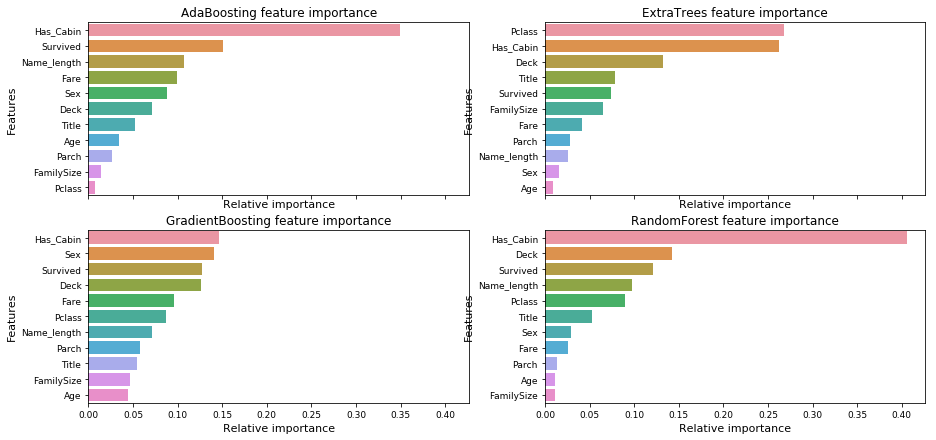

In [80]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,7))
names_classifiers = [("AdaBoosting", adaDTC_best),("ExtraTrees",ExtC_best),
("GradientBoosting",GBC_best), ("RandomForest",random_forest_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=11)
        g.set_ylabel("Features",fontsize=11)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

Nice graphics, but the obsevation is unclear in my opinion:
* On one side, we hope as analyst that the models come out with similar patterns. An easy direction to follow.
* At the same time, "there have been quite a few articles and Kaggle competition winner stories about the merits of having trained models that are more uncorrelated with one another producing better scores". As we say in business, diversity brings better results, this seems to be true with algorithms as well!

# 5. Producing the submission file for Kaggle

Finally having trained and fit all our first-level and second-level models, we can now output the predictions into the proper format for submission to the Titanic competition.
Which model to choose? These are the results of my many submissions:

**Submission 1: **The prediction with **KNeighborsClassifier KNN in Section 4.3.** generates a public score of **0.75119**.

**Submission 2:** The prediction with **random_forest in Section 4.9** generates a public score of **0.73684**.

**Submission 3 (Kaggle Version 85):** The prediction with **gsrandom_forest in Section 4.14 ** after stratification and model cross validation, generates a public score of **0.80382**. 

Decision: submit #3 as best predictor

In [81]:
# Submit File 
Submission3.to_csv("StackingSubmission.csv", index=False)
print("Completed.")

Completed.


# 6. Credits
**Huge credits to Anisotropic,  Yassine Ghouzam, Faron and Sina** for pulling together most of the code in this kernel.

## Fairness

In [50]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [51]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [52]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [53]:
privileged_groups = [{'Sex': 0}]
unprivileged_groups = [{'Sex': 1}]
dataset_orig = StandardDataset(train,
                                  label_name='Survived',
                                  protected_attribute_names=['Sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[0]])


In [54]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.553130


In [55]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import ExtraTreesClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 600

model = ExtraTreesClassifier(max_features=3, min_samples_leaf=7, min_samples_split=7,
                     n_estimators=600)

mdl = model.fit(X_train, y_train)
#with open('../../Results/ExtraTrees/' + nb_fname + '.pkl', 'wb') as f:
#        pickle.dump(mdl, f)

#with open('../../Results/ExtraTrees/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_train, f) 
    
#with open('../../Results/ExtraTrees/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_test, f) 

In [56]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = ExtraTreesClassifier(max_features=3, min_samples_leaf=7, min_samples_split=7,
                     n_estimators=600)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [57]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/ExtraTrees/' + nb_fname + '.csv')
final_result

       0         1       2         3         4         5
0      1 -0.850978 -0.8875  0.760417  0.014657  0.161707
1      2 -0.850978 -0.8875  0.760417  0.014657  0.161707
2      3 -0.850978 -0.8875  0.760417  0.014657  0.161707
3      4 -0.850978 -0.8875  0.760417  0.014657  0.161707
4      5 -0.850978 -0.8875  0.760417  0.014657  0.161707
..   ...       ...     ...       ...       ...       ...
595  596 -0.850978 -0.8875  0.760417  0.014657  0.161707
596  597 -0.850978 -0.8875  0.760417  0.014657  0.161707
597  598 -0.850978 -0.8875  0.760417  0.014657  0.161707
598  599 -0.850978 -0.8875  0.760417  0.014657  0.161707
599  600 -0.850978 -0.8875  0.760417  0.014657  0.161707

[600 rows x 6 columns]


,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T590,T591,T592,T593,T594,T595,T596,T597,T598,T599
accuracy,0.802239,0.802239,0.802239,0.802239,0.802239,0.802239,0.802239,0.802239,0.805970,0.802239,...,0.802239,0.805970,0.802239,0.802239,0.802239,0.802239,0.802239,0.802239,0.802239,0.802239
f1,0.746411,0.746411,0.746411,0.746411,0.746411,0.746411,0.746411,0.746411,0.752381,0.746411,...,0.746411,0.752381,0.746411,0.746411,0.746411,0.746411,0.746411,0.746411,0.746411,0.746411
statistical_parity_difference,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978,-0.844649,-0.850978,...,-0.850978,-0.844649,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978,-0.850978
equal_opportunity_difference,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500,-0.856250,-0.887500,...,-0.887500,-0.856250,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500,-0.887500
average_abs_odds_difference,0.760417,0.760417,0.760417,0.760417,0.760417,0.760417,0.760417,0.760417,0.744792,0.760417,...,0.760417,0.744792,0.760417,0.760417,0.760417,0.760417,0.760417,0.760417,0.760417,0.760417
disparate_impact,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844,-3.817379,-4.222844,...,-4.222844,-3.817379,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844,-4.222844
theil_index,0.161707,0.161707,0.161707,0.161707,0.161707,0.161707,0.161707,0.161707,0.157352,0.161707,...,0.161707,0.157352,0.161707,0.161707,0.161707,0.161707,0.161707,0.161707,0.161707,0.161707
